# Trabajo Practico 1

## Ejercicio 4

El archivo estrellas2023.csv contiene información sobre estrellas de una zona del
espacio previamente inexplorada. Utilizando este archivo, realice las siguientes
operaciones. Incluya en su respuesta los cálculos realizados.


In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [14]:
data = pd.read_csv('estrellas2023.csv')
display(data.head(3), "shape: ", data.shape)

,Edad,Temperatura,clase
0,10,6200,0
1,14,3000,0
2,-155,6600,0


'shape: '

(13, 3)

-----------

**A. Discretice por frecuencia el atributo Edad en dos intervalos llamados Baja y Alta. Indique los rangos de los dos intervalos resultantes, así como la cantidad de ejemplos que hay en cada intervalo.**

<AxesSubplot:xlabel='Edad', ylabel='Observaciones'>

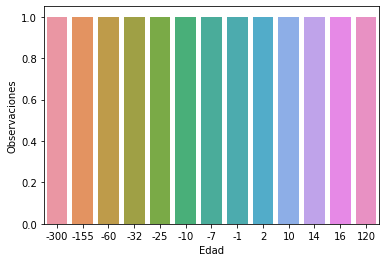

In [65]:
pivot = data['Edad'].value_counts().reset_index()
pivot.columns = ['Edad', 'Observaciones']
pivot = pivot.sort_values(by='Edad')
sns.barplot(data=pivot, x='Edad', y='Observaciones')

In [39]:
print(f"Edades presentes: {data.sort_values('Edad')['Edad'].unique()}")

Edades presentes: [-300 -155  -60  -32  -25  -10   -7   -1    2   10   14   16  120]


Tengo entonces 13 valores posibles de edades, distribuidos en dos intervalos que deberían contener la misma (o similar) cantidad de observaciones.

Podemos para ello utilizar la mediana (medida de tendencia central que divide a la muestra en partes aproximadamente i

In [36]:
print(f"Mediana de Edades: {data.Edad.median()}")

Mediana de Edades: -7.0


Alternativamente, como cada edad tiene solo una observacion y tengo 13 edades, podemos ver que ordenadas de menor a mayor nuestros valores intermedios son -7 y -1, con lo cual nuestro separador de intervalos es (-7 + -1) / 2 = -4
Nuestros intervalos se conforman entonces de (-infinito a -4) y de [-4 a infinito)

In [72]:
int1 = [x for x in data['Edad'] if x < -4]
int2 = [x for x in data['Edad'] if x >= -4]

In [79]:
print(f"Primer intervalo contiene {len(int1)} observaciones mientras que el segundo contiene {len(int2)}")

Primer intervalo contiene 7 observaciones mientras que el segundo contiene 6


|  | Baja | Alta |
|------|--------------|---|
|Intervalos| (-inf - -4) |[4 - inf) |
|Valores | 7|6 |

------------------

**B. Discretice por rango el atributo Edad en dos intervalos llamados Baja y Alta.
Indique los rangos de los dos intervalos resultantes, así como la cantidad de
ejemplos que hay en cada intervalo**

En la discretizacion por rangos, se deben generar intervalos de la misma longitud. En este caso como debo generar dos intervalos, debo tomar el valor minimo y maximo de la muestra (en este caso -300 y 120).

- Rango = -300 a 120
- Longitud del rango 120 - (-300) = 420
- Largo de intervalos = 420 / 2 = 210
- - -300 + 210 = -90
- Intervalos = (-inf - -90), [90 - inf)


|  | Baja | Alta |
|------|--------------|---|
|Intervalos| (-inf - -90) |[-90 - inf) |
|Valores | 2|11 |

-----------

**Calcule la correlación lineal entre los atributos Edad y Temperatura. Indique la
intensidad de la correlación (no hay correlación/débil/fuerte) y el tipo
(positiva/negativa)**

In [87]:

corr = data[['Edad', 'Temperatura']].corr()
corr

,Edad,Temperatura
Edad,1.000000,0.159637
Temperatura,0.159637,1.000000


|  | Correlacion | 
|------|--------------|
|Valor| 0.15|
|Intensidad|Debil|
|Tipo|Positiva|

-------------------------------------------

**Dibuje un Diagrama de Caja de Tukey de la variable Edad e inclúyalo en la
respuesta. Indique también los valores del cuadro**

In [130]:
mediana = data['Edad'].median()
# q1, q3 = data['Edad'].quantile([0.25, 0.75])

# tengo 13 observaciones, las que debo dividir en 4 para calcular los quartiles.
n1 = (13 + 1)/4 # 3.5, entonces 0.5 es alfa 1
q1 = -60 * (1-0.5) -32 * 0.5

n3 = (13+1) * (3/4) # da 10.5, siendo alfa3 0.5
q3 = 10 * (1-0.5) + 14 *0.5
ri = q3 - q1
bigote_superior_atipicos_leve = q3 + 1.5*ri
bigote_inferior_atipicos_leve = q1 - 1.5*ri
bigote_superior_atipicos_extremos = q3 + 3*ri
bigote_inferior_atipicos_extremos = q1 - 3*ri

edades_ordenadas = sorted(x for x in data['Edad'])

bigote_inferior = min([num for num in edades_ordenadas if num >= bigote_inferior_atipicos_leve ], default=None)
bigote_superior = max([num for num in edades_ordenadas if num <= bigote_superior_atipicos_leve ], default=None)




Como siguiente paso, detallamos las medidas obtenidas

In [133]:
variables = {
    "Edades": edades_ordenadas,
    "mediana": mediana,
    "q1": q1,
    "q3": q3,
    "ri": ri,
    "bigote_superior_atipicos_leve": bigote_superior_atipicos_leve,
    "bigote_inferior_atipicos_leve": bigote_inferior_atipicos_leve,
    "bigote_superior_atipicos_extremos": bigote_superior_atipicos_extremos,
    "bigote_inferior_atipicos_extremos": bigote_inferior_atipicos_extremos,
    "bigote_inferior": bigote_inferior,
    "bigote_superior": bigote_superior
}

for nombre, valor in variables.items():
    print(f"{nombre}: {valor}")

Edades: [-300, -155, -60, -32, -25, -10, -7, -1, 2, 10, 14, 16, 120]
mediana: -7.0
q1: -46.0
q3: 12.0
ri: 58.0
bigote_superior_atipicos_leve: 99.0
bigote_inferior_atipicos_leve: -133.0
bigote_superior_atipicos_extremos: 186.0
bigote_inferior_atipicos_extremos: -220.0
bigote_inferior: -60
bigote_superior: 16


|  | Resultado | 
|------|--------------|
|Mediana| -7|
|Q1|-46|
|Q3|12|
|RI|58|
|Bigote Sup|16|
|Bigote Inf|-60|
|Intervalos valores atipicos leves|(-220, -133) y (99, 186)|
|Valores atipicos leves|-155,120|
|Intervalos valores atipicos Extremos|(-inf , -220) y (186, inf)|
|Valores atipicos Extremos|-300|

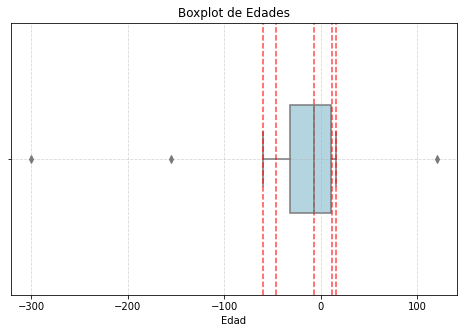

In [136]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['Edad'], color="lightblue", width=0.4)

# Agregar líneas verticales para destacar valores clave
for valor in [q1, mediana, q3, bigote_inferior, bigote_superior]:
    plt.axvline(valor, linestyle="dashed", color="red", alpha=0.7)


plt.title("Boxplot de Edades", fontsize=12)
plt.xlabel("Edad")
plt.grid(True, linestyle="--", alpha=0.5)

# Mostrar el gráfico
plt.show()